In [41]:
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
#ПРосмотрим информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


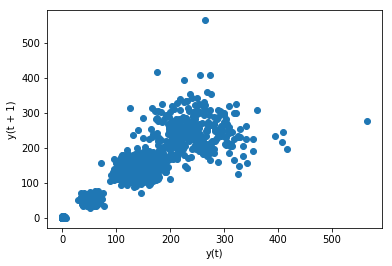

In [4]:
#Визуализируем наш датасет при омощи нескольких функций
#Можно увидеть что есть несколько выделяющихся значений
lag_plot(data)

In [5]:
#Изменяю значения для снс
data['target'] = data['target'].replace(0, 'No heart disease')
data['target'] = data['target'].replace(1, 'Have heart disease')

In [6]:
#Разбиваю на датасет надвое (по колонкам) для того чтобы было удобнее смотреть
data1 = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg', 'target']]
data2 = data[ ['thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']]

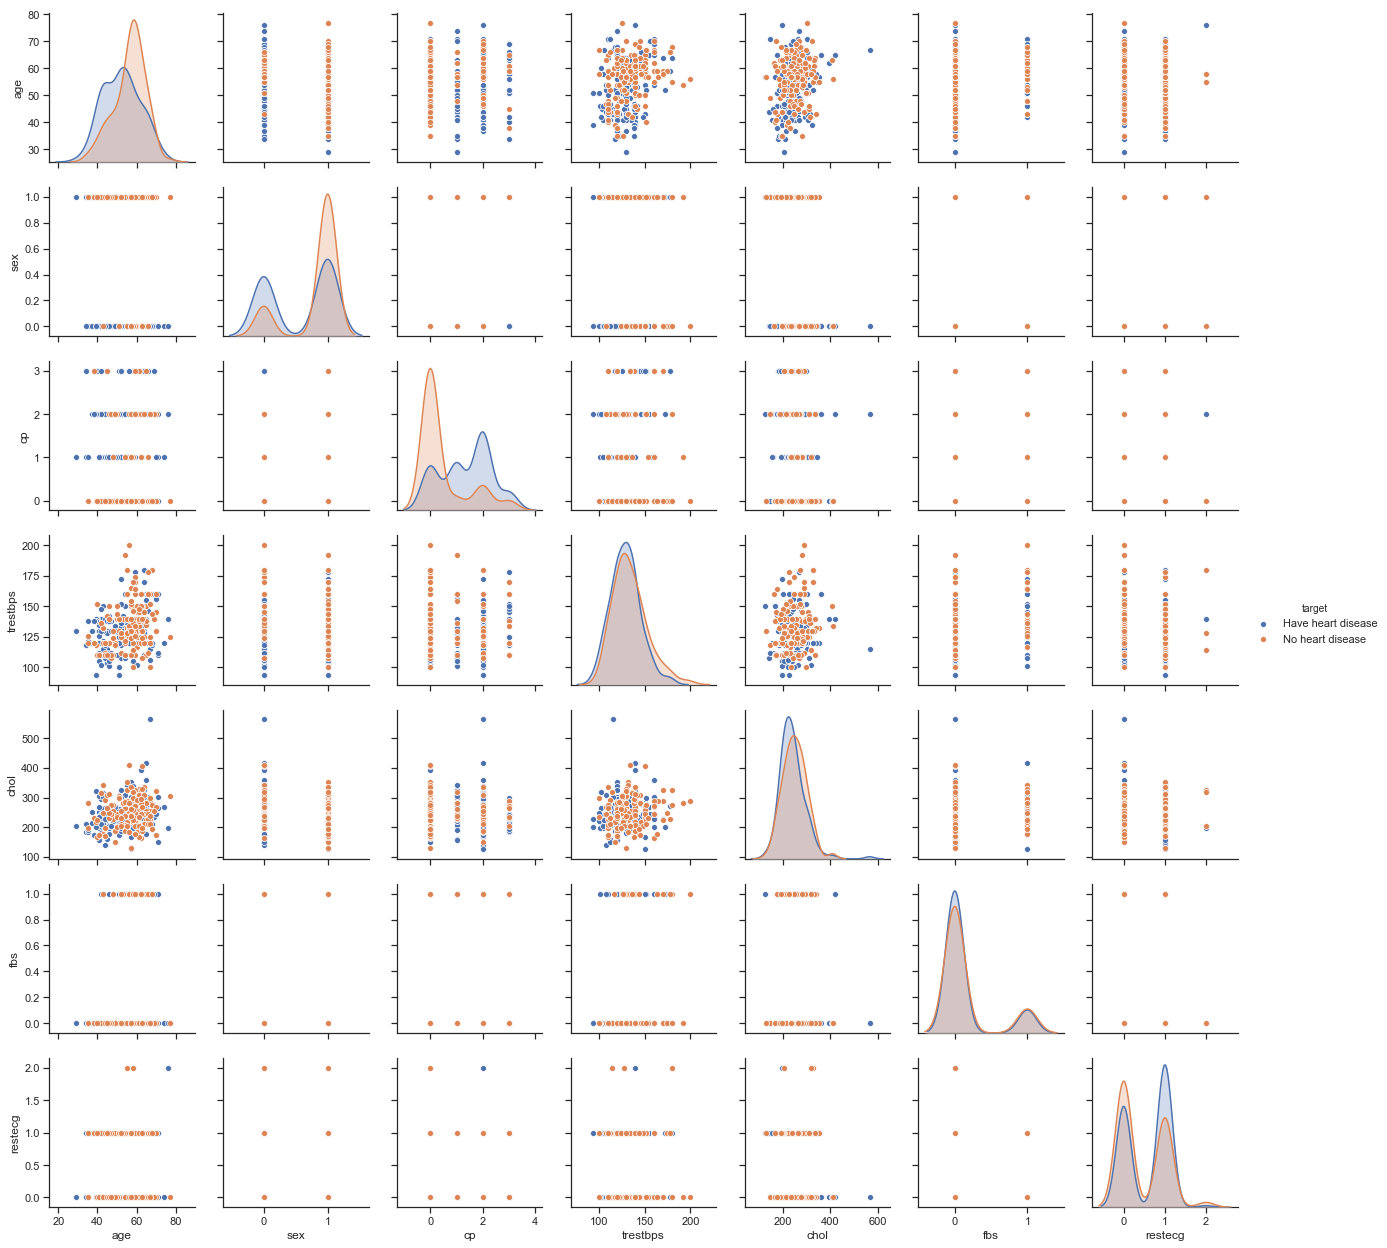

In [7]:
#Видно что в данных есть выбросы
sns.set(style="ticks")

sns.pairplot(data1, hue = 'target')

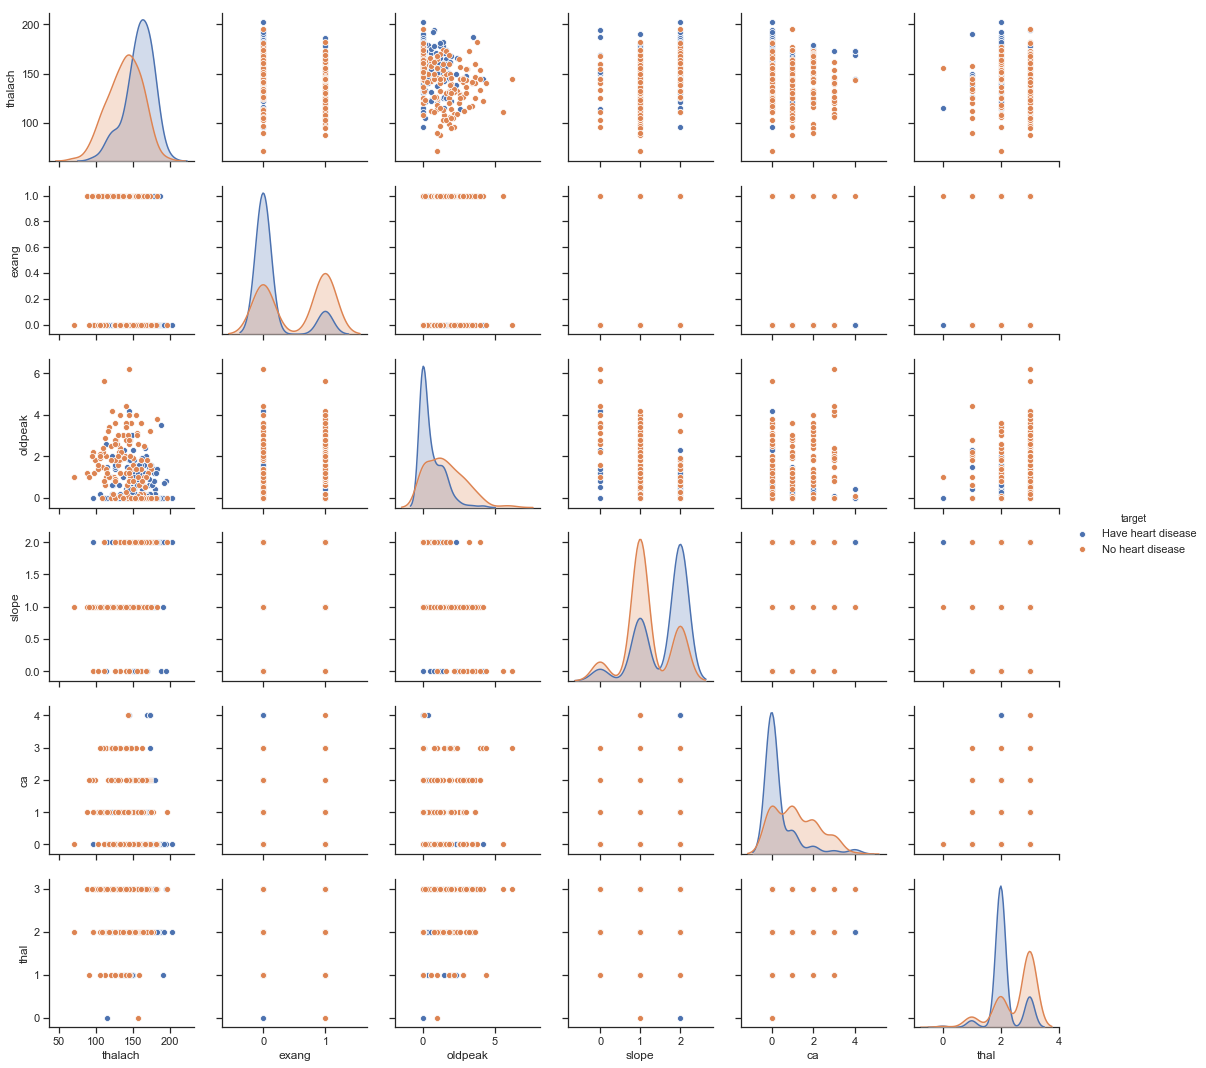

In [8]:
sns.set(style="ticks")

sns.pairplot(data2, hue = 'target')

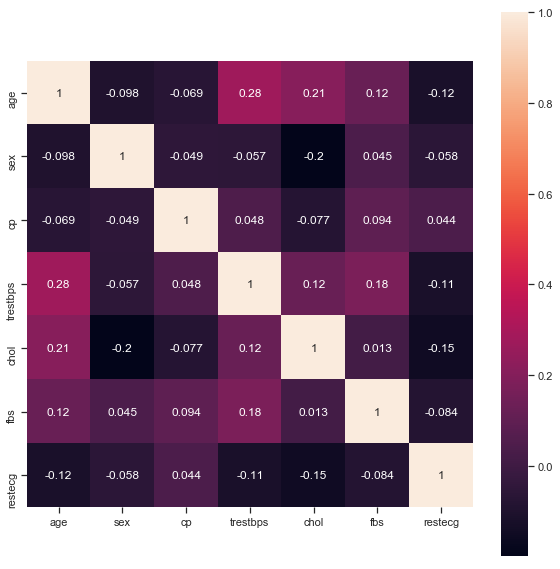

In [9]:
corr = data1.iloc[:, :-1].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,square=True)

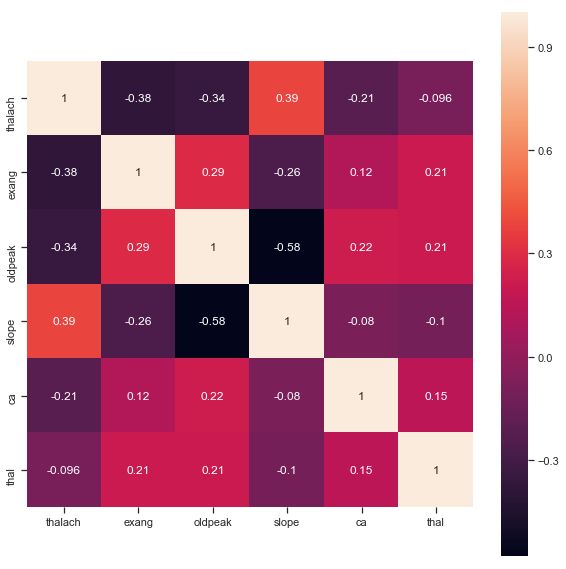

In [10]:
corr = data2.iloc[:, :-1].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,square=True)

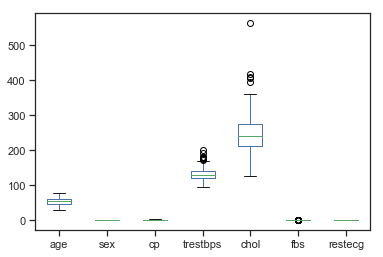

In [11]:
#На этом графике уже очень хорошо видно в каких колонках присутствуют выбросы
data1.plot(kind='box')

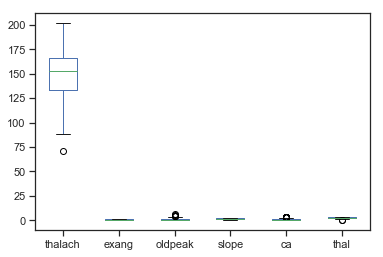

In [12]:
data2.plot(kind='box')

In [13]:
#Функция для оброботки выбросов
def reject_outliers(data):
    m = 2
    u = np.mean(data)
    s = np.std(data)
    filtered = [i for i in range(len(data)) if not (u - 2 * s < data[i] < u + 2 * s)]
    return filtered

In [14]:
#Оброботка выбросов
for element in data.columns:
    print (element)
    try:
        indexis = reject_outliers(data[str(element)])
    
        data = data.drop(indexis)
        data = data.reset_index()
        data.drop('index', axis=1, inplace=True)
    except:
        continue

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


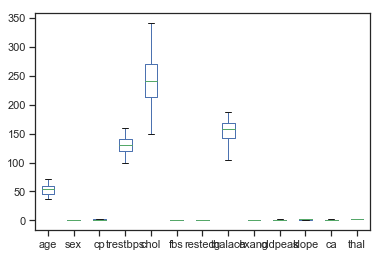

In [15]:
#Проверяем остались ли точки - выбросы
data.plot(kind='box')

In [17]:
data['target'] = data['target'].replace('No heart disease', 0)
data['target'] = data['target'].replace('Have heart disease', 1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


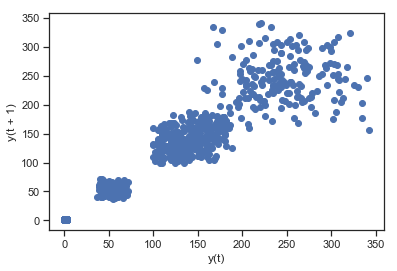

In [18]:
#Более точно рассмотрим датасет
lag_plot(data)

In [19]:
#нормализация
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
data_n = pd.DataFrame(np_scaled)

c:\users\ablaeva.t\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [43]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [44]:
#Разбиение датасета на две выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [45]:
def GetScoresForModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    print ('+++++++++')
    print (str(model))
    print ('---------')
    print ('Score')
    print (model.score(X_test, y_test))
    print ('---------')
    print ('precision_score')
    print (precision_score(y_test, model.predict(X_test)))
    print ('---------')
    print ('f1_score')
    print (f1_score(y_test, model.predict(X_test)))

In [46]:
#Набор моделей
lsvm = LinearSVC()
svm = SVC(kernel = 'rbf', gamma='scale')
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
ansamble = [lsvm, svm, knn, rf]
for model in ansamble:
    GetScoresForModel(model, X_train, y_train, X_test, y_test)

+++++++++
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
---------
Score
0.6944444444444444
---------
precision_score
0.696969696969697
---------
f1_score
0.8070175438596493
+++++++++
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
---------
Score
0.5555555555555556
---------
precision_score
0.6538461538461539
---------
f1_score
0.68
+++++++++
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
---------
Score
0.5277777777777778
---------
precision_score
0.64
---------
f1_score
0.6530612244897959
+++++++++
RandomForestClassifier(boot

c:\users\ablaeva.t\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ablaeva.t\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
X_n, y_n = data_n.iloc[:, :-1], data_n.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.25)

In [32]:
for model in ansamble:
    GetScoresForModel(model, X_train, y_train, X_test, y_test)

+++++++++
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
---------
Score
0.8222222222222222
---------
log_loss
6.140333527641482
---------
f1_score
0.8787878787878788
+++++++++
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
---------
Score
0.8666666666666667
---------
log_loss
4.6052412613152205
---------
f1_score
0.90625
+++++++++
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
---------
Score
0.8444444444444444
---------
log_loss
5.372805163310133
---------
f1_score
0.8955223880597015
+++++++++
RandomForestClassifier

c:\users\ablaeva.t\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
#Кросс валидация
for model in ansamble:
    print (np.average(cross_val_score(model, X, y, cv=10)))
    print (str(model))

c:\users\ablaeva.t\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ablaeva.t\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ablaeva.t\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ablaeva.t\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\ablaeva.t\appdata\local\programs\python\pyt

0.6131944444444445
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
0.6416666666666666
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.5965277777777778
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
0.8041666666666668
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimator

In [ ]:
# По результатам, на выходе можно сказать что случайный лес справился с задачей лучше чем другие алгоритмы